In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('QF632_Project_1.csv')
print('Original df length', len(df))

Original length 1038


In [53]:
# Review the quality of the data
def review_data_quality(df):
    errors = []

  # Check the length of the dataset
    if len(df) == 0:
        errors.append("Dataset is empty.")
        
    # Check for duplicated rows
    duplicated_rows = df[df.duplicated()]
    if not duplicated_rows.empty:
        errors.append("Duplicated rows found.")
        df = df.drop_duplicates()
        
    # Check object types
    expected_types = {
        'Date': 'datetime64[ns]',
        'Signal': 'float64',
        'Open': 'float64',
        'High': 'float64',
        'Low': 'float64',
        'Close': 'float64',
        'Adj Close': 'float64',
    }
    
    # Check and correct data types
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Signal'] = pd.to_numeric(df['Signal'], errors='coerce')
    df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
    df['High'] = pd.to_numeric(df['High'], errors='coerce')
    df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')

    # Collect errors for data type mismatches
    for column, expected_type in expected_types.items():
        if df[column].dtype != expected_type:
            errors.append(f"Column '{column}' is of type {df[column].dtype} but expected {expected_type}.")

    # Check for NaN values and handle them
    nan_summary = df.isna().sum()
    nan_columns = nan_summary[nan_summary > 0].index.tolist()

    for column in nan_columns:
        errors.append(f"Column '{column}' has {nan_summary[column]} NaN values.")
        # Interpolate or forward fill, careful not to include future rows
        df[column] = df[column].interpolate(method='linear', limit_direction='forward')
        # Fill remaining NaNs if interpolation cannot fill them
        df[column] = df[column].fillna(method='ffill')

    return errors, df

In [54]:
# Difference all columns except Date
def difference_columns(df):
    df_diff = df.copy()
    df_diff.iloc[:, 1:] = df_diff.iloc[:, 1:].diff()
    return df_diff.dropna()

In [55]:
# Identify outliers using IQR method
def identify_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

In [56]:
# Plotting functions for outlier detection
def plot_outliers(df):
    numeric_columns = df.select_dtypes(include=['float64']).columns

    # Scatter plots with outliers highlighted
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Date'], df[column], alpha=0.5, label='Data')
        
        # Identify and plot outliers
        outliers = identify_outliers(df[column])
        plt.scatter(df['Date'][outliers], df[column][outliers], color='red', label='Outliers')
        
        plt.title(f'Scatter Plot of {column} over Time')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.show()

    # Box plots
    plt.figure(figsize=(15, 10))
    df[numeric_columns].boxplot()
    plt.title('Box Plot of Numeric Columns')
    plt.xticks(rotation=45)
    plt.show()

In [57]:
# Main cleaning function
def clean_data(file_path):
    # Load data
    df = pd.read_csv(file_path)
    
    # Review data quality and apply corrections
    errors, df_cleaned = review_data_quality(df)
    
    # Difference all columns except Date
    df_diff = difference_columns(df_cleaned)
    
    return errors, df_cleaned, df_diff

In [61]:
# Usage example
errors, df_cleaned, df_diff = clean_data('QF632_Project_1.csv')

print('df_cleaned length', len(df_cleaned))
print('df_diff length', len(df_diff))


# Output the results
print("Data Quality Errors and Corrections:")
for error in errors:
    print(error)

print("\nCleaned Data:")
print(df_cleaned.head())

print("\nDifferenced Data:")
print(df_diff.head())

df_cleaned length 1038
df_diff length 1037
Data Quality Errors and Corrections:

Cleaned Data:
        Date     Signal        Open        High         Low       Close  \
0 2015-11-19  13.768540  116.440002  116.650002  115.739998  116.059998   
1 2015-11-20  13.608819  116.480003  117.360001  116.379997  116.809998   
2 2015-11-23  12.990589  116.709999  117.889999  116.680000  117.389999   
3 2015-11-24  12.667435  116.879997  118.419998  116.559998  118.250000   
4 2015-11-25  13.019910  118.300003  119.320000  118.110001  119.169998   

    Adj Close  
0  108.281601  
1  108.981323  
2  109.522453  
3  110.324837  
4  111.183159  

Differenced Data:
        Date    Signal      Open      High       Low     Close  Adj Close
1 2015-11-20 -0.159721  0.040001  0.709999  0.639999  0.750000   0.699722
2 2015-11-23 -0.618230  0.229996  0.529998  0.300003  0.580001   0.541130
3 2015-11-24 -0.323154  0.169998  0.529999 -0.120002  0.860001   0.802384
4 2015-11-25  0.352475  1.420006  0.900002 

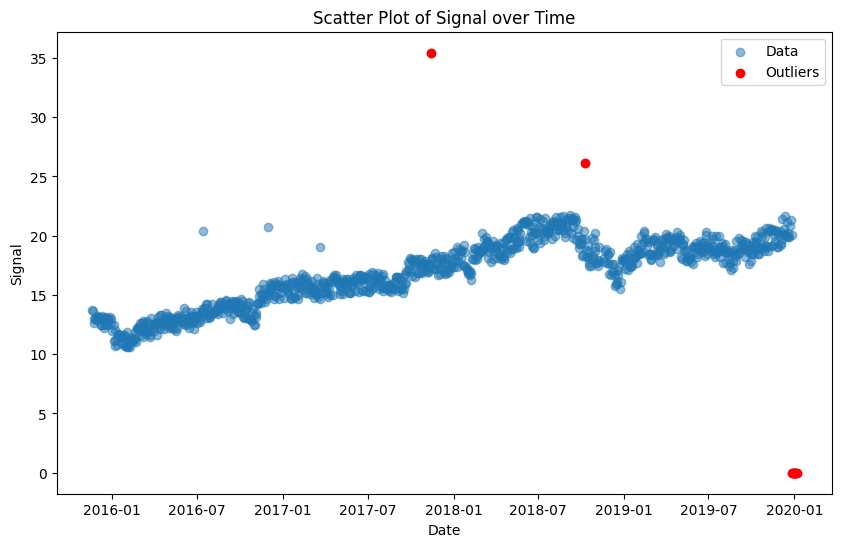

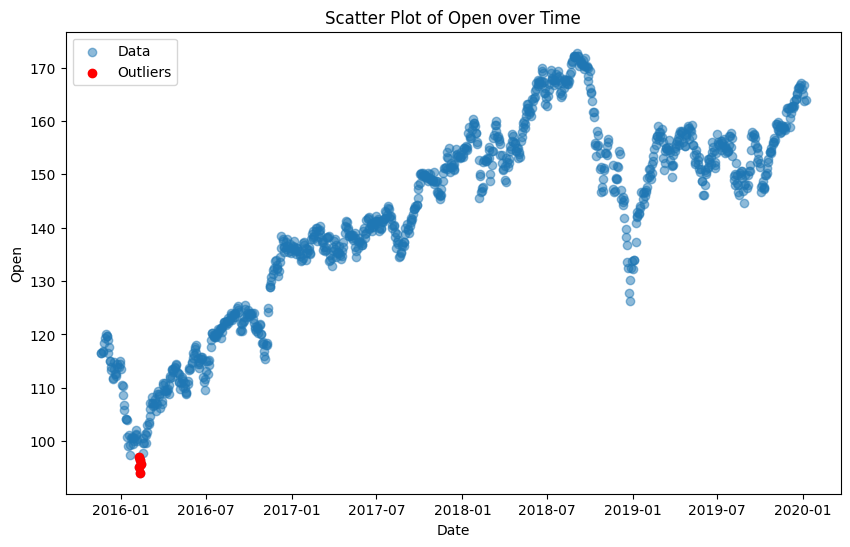

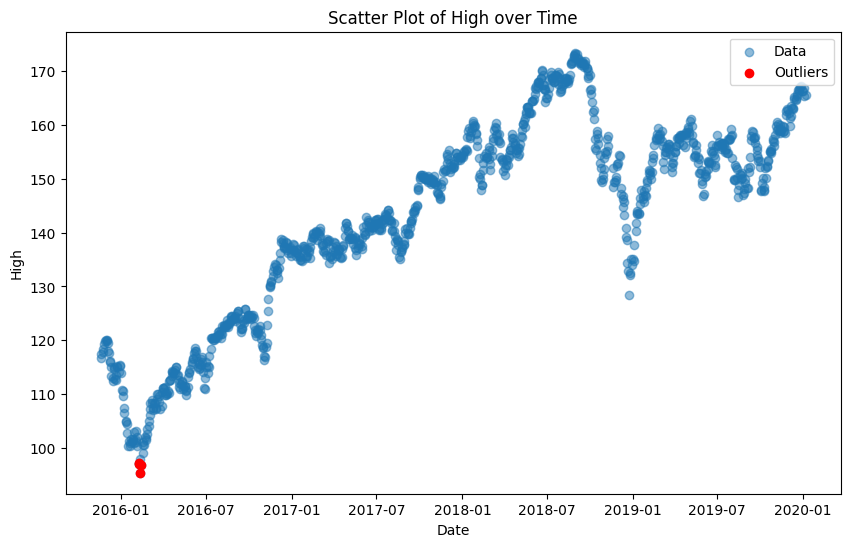

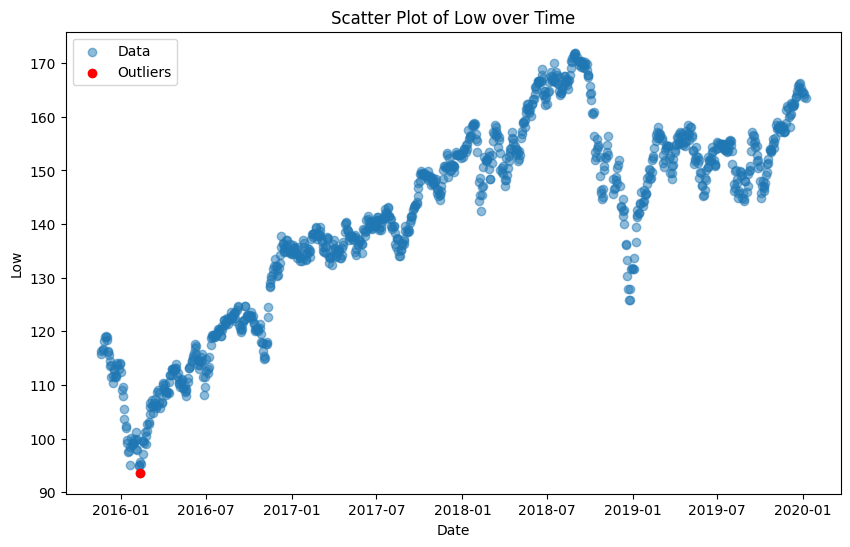

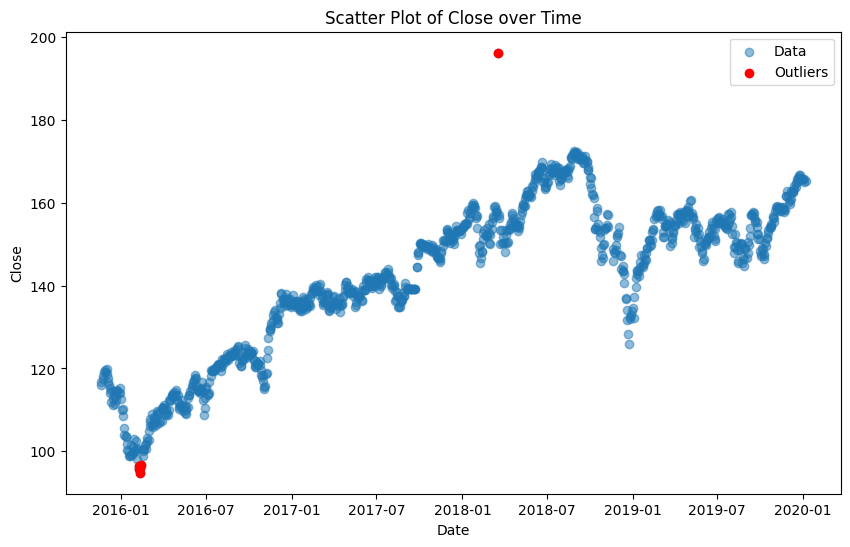

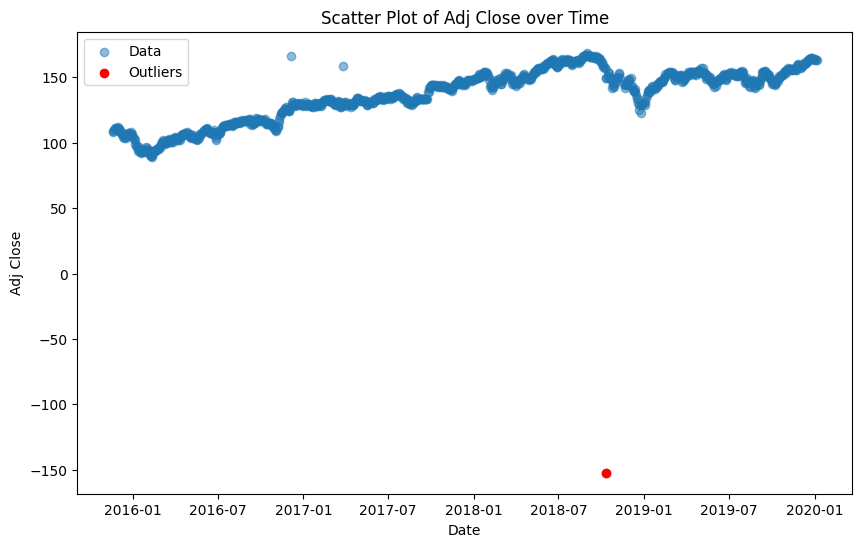

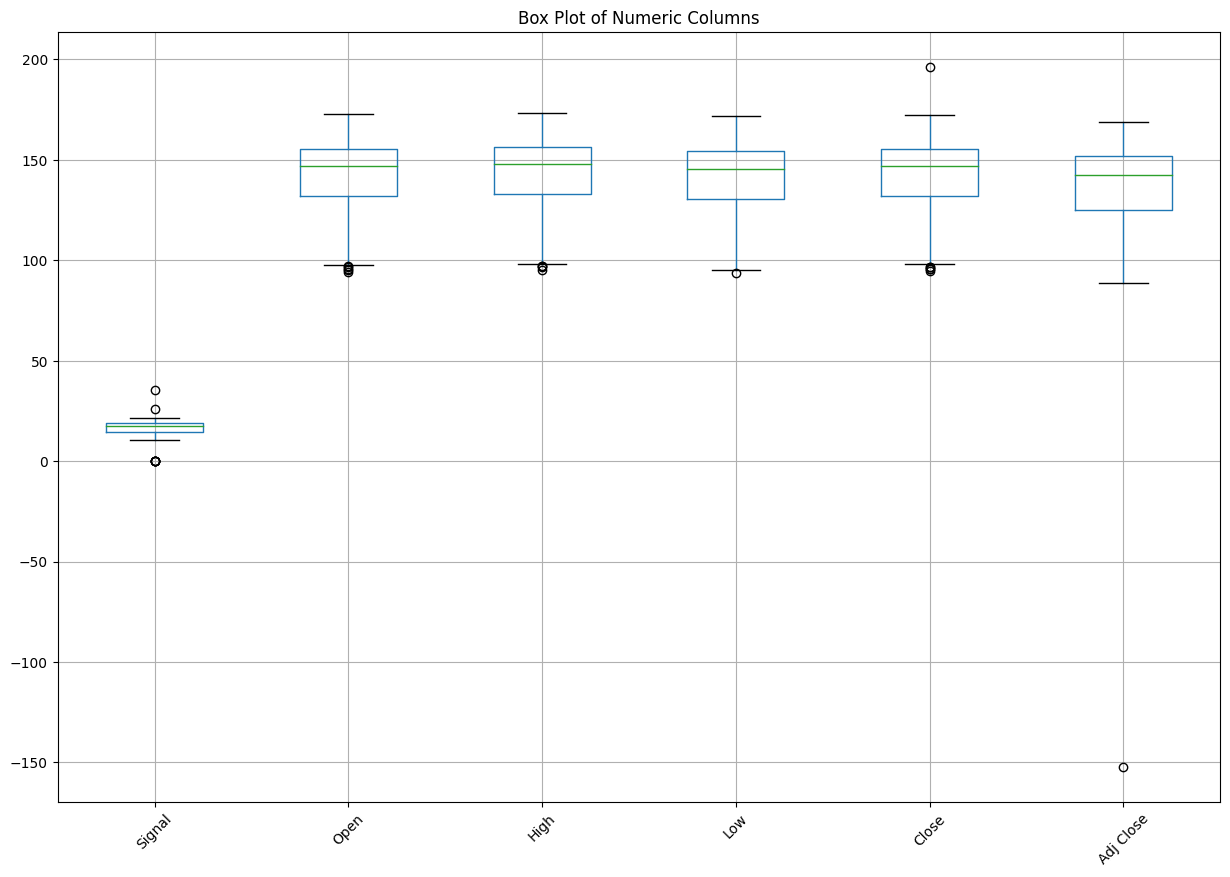

In [62]:
# Plotting outliers

plot_outliers(df_cleaned)
# TimeSeries price
# Continuous Nature:
# Time series price data is typically continuous during regular trading hours, meaning there should not have large, abrupt changes from one point to the next during this period.
# 
# After-Hours Trading:
# Prices can exhibit significant gaps between the closing price of one day and the opening price of the next trading day due to after-hours trading activities, news, earnings reports, and other factors.
# These gaps can appear as outliers when the data is visualized or analyzed.